# D212 Data Mining II
## Performance Assessment
## Task 2: Dimensionality Reduction Methods

In [3]:
# Import libraries needed
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import the data set
churn = pd.read_csv('/Users/jillrivera/Documents/WGU/D212 Data Mining II/churn_clean.csv')

In [5]:
# Define continuous features.
# Start with numerical data, then remove non-continuous data.

features = churn.select_dtypes(include=['number']).columns.tolist()
features.remove('CaseOrder') # id type field, non-continuous
features.remove('Zip') # non-continuous
features.remove('Item1') # non-continuous
features.remove('Item2') # non-continuous
features.remove('Item3') # non-continuous
features.remove('Item4') # non-continuous
features.remove('Item5') # non-continuous
features.remove('Item6') # non-continuous
features.remove('Item7') # non-continuous
features.remove('Item8') # non-continuous
features

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [6]:
# Data frame creation of only continuous numerical values. 
df = pd.DataFrame(churn,columns=features)
print(df.head().round(3).T)
print(df.info())
print(df.shape)

                              0          1         2          3          4
Lat                      56.251     44.329    45.356     32.967     29.380
Lng                    -133.376    -84.241  -123.247   -117.248    -95.807
Population               38.000  10446.000  3735.000  13863.000  11352.000
Children                  0.000      1.000     4.000      1.000      0.000
Age                      68.000     27.000    50.000     48.000     83.000
Income                28561.990  21704.770  9609.570  18925.230  40074.190
Outage_sec_perweek        7.978     11.699    10.753     14.914      8.147
Email                    10.000     12.000     9.000     15.000     16.000
Contacts                  0.000      0.000     0.000      2.000      2.000
Yearly_equip_failure      1.000      1.000     1.000      0.000      1.000
Tenure                    6.796      1.157    15.754     17.087      1.671
MonthlyCharge           172.456    242.633   159.948    119.957    149.948
Bandwidth_GB_Year       9

In [7]:
# Standardize the data and scale to avoid dominance.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns = features)
print(scaled_df.head().round(3).T)
print(scaled_df.info())
print(scaled_df.shape)

                          0      1      2      3      4
Lat                   3.217  1.025  1.214 -1.065 -1.725
Lng                  -2.810  0.432 -2.142 -1.746 -0.332
Population           -0.673  0.048 -0.417  0.285  0.111
Children             -0.972 -0.507  0.891 -0.507 -0.972
Age                   0.721 -1.260 -0.149 -0.245  1.446
Income               -0.399 -0.642 -1.071 -0.741  0.009
Outage_sec_perweek   -0.680  0.570  0.252  1.651 -0.623
Email                -0.666 -0.005 -0.997  0.986  1.317
Contacts             -1.006 -1.006 -1.006  1.018  1.018
Yearly_equip_failure  0.947  0.947  0.947 -0.626  0.947
Tenure               -1.049 -1.262 -0.710 -0.660 -1.243
MonthlyCharge        -0.004  1.630 -0.295 -1.227 -0.528
Bandwidth_GB_Year    -1.138 -1.186 -0.612 -0.562 -1.428
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   L

In [8]:
# Export scaled data to a CSV file.
scaled_df.to_csv('churn_scaled_task2.csv', index=False, header=True)

#### Principal Component Analysis with 13 Components

In [9]:
# PCA(n_components = 13)
from sklearn.decomposition import PCA

pca = PCA(n_components=13) 
pca.fit(scaled_df)
pc = pca.transform(scaled_df)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
pc_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(pc)

[[-1.63263488 -3.29635409  0.57818418 ...  0.01470108  0.70379222
  -0.02556163]
 [-1.67888952 -0.66379299 -0.16526261 ... -1.46285917  0.92739224
  -0.03690825]
 [-0.94798506 -1.6621073   1.50054206 ...  0.72990114 -0.25927031
   0.0603088 ]
 ...
 [ 0.58345317 -0.27778175  0.76059769 ... -0.28768661 -1.01593756
  -0.08826337]
 [ 2.03631986  2.00793622 -0.95591075 ... -0.63146318  0.64022982
  -0.06961958]
 [ 1.57452062  0.96794063 -0.79444654 ... -1.26424798 -0.15401524
  -0.03415051]]


In [10]:
# Create dataframe of principal components.
pc_df = pd.DataFrame(pc, columns=pc_labels)
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.632635 -3.296354  0.578184  2.947064  0.049200  0.236283 -1.239584   
1    -1.678890 -0.663793 -0.165263 -0.587533 -0.864341  1.227328 -1.145874   
2    -0.947985 -1.662107  1.500542  1.260078 -0.604303  1.120935 -1.470020   
3    -0.928918  0.883883 -0.255494  1.343020 -1.897874  0.114564  0.424392   
4    -1.889784  1.581549 -0.992000  0.972279  1.138263 -0.503190 -0.011660   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.883026 -0.917225  0.119696 -1.368667 -0.215508 -0.483779  1.335592   
9996  1.468912  3.517718  0.444508  0.815071 -1.000443 -0.606728  0.790954   
9997  0.583453 -0.277782  0.760598  0.478853  0.423992 -0.918188 -0.197058   
9998  2.036320  2.007936 -0.955911 -0.130067 -1.730513  0.281978 -0.288711   
9999  1.574521  0.967941 -0.794447 -0.841324 -1.957076 -0.529423 -0.461146   

           PC8       PC9      PC10      PC11      PC12      PC1

In [11]:
# Create dataframe of loadings.
load = pd.DataFrame(pca.components_.T,
                    columns = pc_labels,
                    index=df.columns)
load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887,-0.010719,-0.020375,0.090273,0.018619,0.053958,0.674376,0.001077
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695,-0.052349,-0.086499,-0.172285,-0.151301,-0.112280,0.375138,0.000788
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791,0.053682,0.079161,-0.027392,0.055304,0.100818,0.631729,-0.000070
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597,0.034812,-0.065531,0.192459,0.437471,0.565626,-0.011794,-0.021597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321,-0.188399,0.093484,0.342892,-0.083596,0.614892,-0.037729,0.022360
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371,0.773549,0.335467,0.246663,-0.275852,-0.033742,0.006645,-0.000941
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523,0.051915,-0.184658,0.057056,-0.515406,0.223304,-0.034155,0.000271
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463,0.003835,-0.125375,0.760622,-0.052146,-0.247985,0.027357,0.000274
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442,0.519791,-0.510974,-0.052695,0.494601,-0.028194,-0.011878,-0.000947
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380,-0.290766,-0.194665,0.397088,0.143419,-0.376943,0.038880,-0.000083


In [12]:
# Print total explained variance for all 13 principal components.
print('Variance explained by all 13 principal components =', 
      sum(pca.explained_variance_ratio_*100).round(3))

Variance explained by all 13 principal components = 100.0


In [13]:
# Explained variance for each component.
pca.explained_variance_ratio_ * 100

array([15.34388817,  9.49252346,  8.10511076,  8.03530799,  7.87065959,
        7.77446725,  7.68617423,  7.63519934,  7.57255848,  7.39838628,
        7.38768662,  5.65599547,  0.04204237])

In [14]:
# Captured variance per component. 
varex1 = pca.explained_variance_ratio_*100
var_df1 = pd.DataFrame(varex1.round(2), 
            columns=['Captured variance per component'],
                 index = pc_labels)
var_df1

,Captured variance per component
PC1,15.34
PC2,9.49
PC3,8.11
PC4,8.04
PC5,7.87
PC6,7.77
PC7,7.69
PC8,7.64
PC9,7.57
PC10,7.40


In [15]:
# Eigenvalues for each component.
eigenvalues = pca.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4),
            columns=['Eigenvalues per PC'],
            index = pc_labels)
eigen_df

,Eigenvalues per PC
PC1,1.9949
PC2,1.2342
PC3,1.0538
PC4,1.0447
PC5,1.0233
PC6,1.0108
PC7,0.9993
PC8,0.9927
PC9,0.9845
PC10,0.9619


In [16]:
# Cumulative sum of explained variance.
np.cumsum(pca.explained_variance_ratio_*100)

array([ 15.34388817,  24.83641162,  32.94152239,  40.97683038,
        48.84748997,  56.62195722,  64.30813145,  71.94333079,
        79.51588927,  86.91427555,  94.30196216,  99.95795763,
       100.        ])

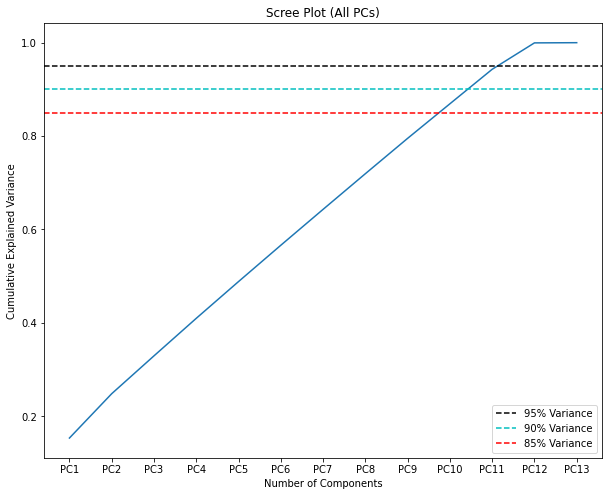

In [17]:
# Scree Plot 
fig, ax = plt.subplots(figsize =(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot (All PCs)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
ax.set_xticks(range(0,13))
ax.set_xticklabels(pc_labels)
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
plt.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.show()

### Principal Component Analysis with 6 Components

In [30]:
# PCA(n_components=6)
pca6 = PCA(n_components=6).fit(scaled_df)
pc6 = pca6.transform(scaled_df)
per_var = np.round(pca6.explained_variance_ratio_*100,decimals=1)
pc6_labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
print(pc6)

[[-1.63263488 -3.29635409  0.57818418  2.9470639   0.04919956  0.23628275]
 [-1.67888952 -0.66379299 -0.16526261 -0.58753284 -0.86434097  1.2273278 ]
 [-0.94798506 -1.6621073   1.50054206  1.26007828 -0.60430283  1.12093466]
 ...
 [ 0.58345317 -0.27778175  0.76059769  0.47885258  0.42399214 -0.91818774]
 [ 2.03631986  2.00793622 -0.95591075 -0.13006707 -1.73051332  0.2819779 ]
 [ 1.57452062  0.96794063 -0.79444654 -0.84132395 -1.9570759  -0.52942312]]


In [31]:
print((pca6.explained_variance_ratio_*100).round(3))
print((np.cumsum(pca6.explained_variance_ratio_*100).round(3)))

[15.344  9.493  8.105  8.035  7.871  7.774]
[15.344 24.836 32.942 40.977 48.847 56.622]


In [34]:
# Create dataframe of principal components.
pc_df = pd.DataFrame(pc6, columns=pc6_labels)
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6
0    -1.632635 -3.296354  0.578184  2.947064  0.049200  0.236283
1    -1.678890 -0.663793 -0.165263 -0.587533 -0.864341  1.227328
2    -0.947985 -1.662107  1.500542  1.260078 -0.604303  1.120935
3    -0.928918  0.883883 -0.255494  1.343020 -1.897874  0.114564
4    -1.889784  1.581549 -0.992000  0.972279  1.138263 -0.503190
...        ...       ...       ...       ...       ...       ...
9995  1.883026 -0.917225  0.119696 -1.368667 -0.215508 -0.483779
9996  1.468912  3.517718  0.444508  0.815071 -1.000443 -0.606728
9997  0.583453 -0.277782  0.760598  0.478853  0.423992 -0.918188
9998  2.036320  2.007936 -0.955911 -0.130067 -1.730513  0.281978
9999  1.574521  0.967941 -0.794447 -0.841324 -1.957076 -0.529423

[10000 rows x 6 columns]


In [36]:
# Create dataframe of loadings.
load = pd.DataFrame(pca6.components_.T,columns = pc6_labels,
                    index=df.columns)
load

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.023161,-0.714010,-0.031715,0.109414,-0.094872,-0.030887
Lng,0.007911,0.180879,-0.285753,-0.736871,0.344620,-0.087695
Population,-0.001230,0.653439,0.151916,0.322012,-0.119517,0.098791
Children,0.014244,-0.014267,0.447882,-0.464670,-0.107498,0.130597
Age,0.001860,0.052795,-0.443537,0.227235,0.436759,-0.096321
Income,0.004185,-0.054602,0.195742,-0.041772,0.312779,0.100371
Outage_sec_perweek,0.005811,0.009174,-0.249550,-0.126214,-0.455981,0.597523
Email,-0.020020,0.152355,-0.092711,-0.144998,-0.353186,-0.403463
Contacts,0.004283,0.031043,-0.447906,0.108875,0.011245,0.082442
Yearly_equip_failure,0.017665,-0.007070,0.153686,0.063449,0.420468,0.592380


Text(0.5, 1.0, 'Principal Component Matrix')

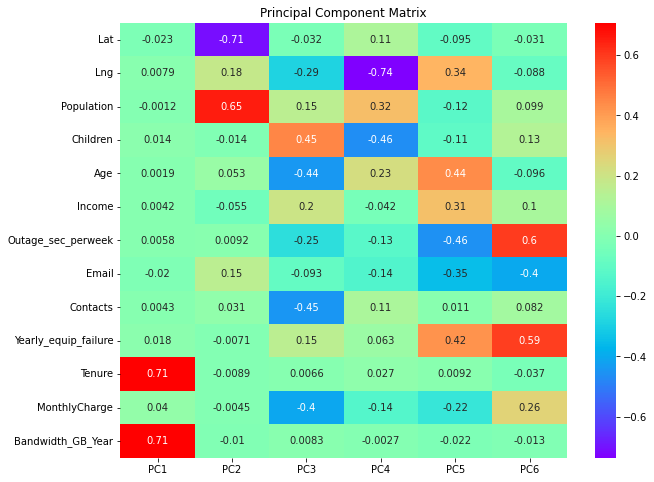

In [37]:
# Heatmap of PCs and loadings.
plt.figure(figsize=(10,8))
sns.heatmap(load,cmap='rainbow',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')

In [38]:
# Print total explained variance for six (6) principal components.
print('Variance explained by six (6) principal components =', 
      sum(pca6.explained_variance_ratio_*100).round(3))

Variance explained by six (6) principal components = 56.622


In [39]:
# Explained explained variance for each component.
pca6.explained_variance_ratio_ * 100

array([15.34388817,  9.49252346,  8.10511076,  8.03530799,  7.87065959,
        7.77446725])

In [40]:
# Captured variance per component.
varex1 = pca6.explained_variance_ratio_*100
var_df1 = pd.DataFrame(varex1.round(2), 
            columns=['Captured variance per component'],
                 index = pc6_labels)
var_df1

,Captured variance per component
PC1,15.34
PC2,9.49
PC3,8.11
PC4,8.04
PC5,7.87
PC6,7.77


In [41]:
# Eigenvalues per component.
eigenvalues = pca6.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4),
            columns=['Eigenvalues per component'],
            index = pc6_labels)
eigen_df

,Eigenvalues per component
PC1,1.9949
PC2,1.2342
PC3,1.0538
PC4,1.0447
PC5,1.0233
PC6,1.0108


In [42]:
# Cumulative sum
np.cumsum(pca6.explained_variance_ratio_*100)

array([15.34388817, 24.83641162, 32.94152239, 40.97683038, 48.84748997,
       56.62195722])

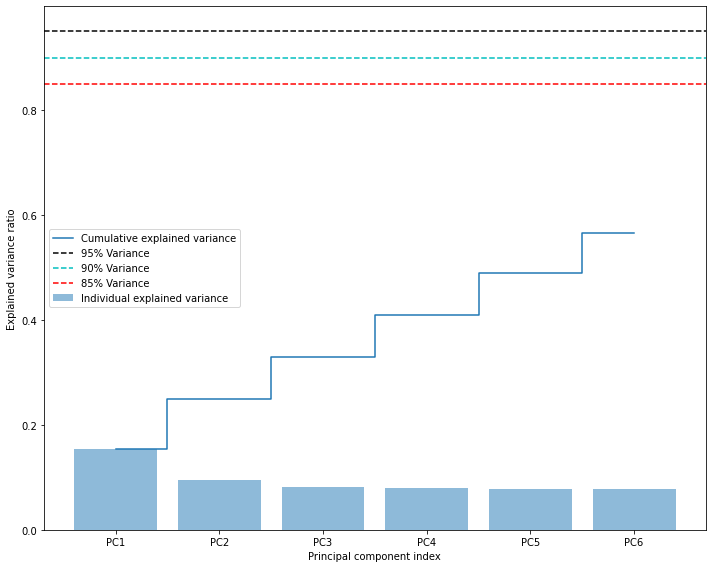

In [43]:
# Explained Variance of Principal Components
exp_var_pca = pca6.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',
        tick_label=pc6_labels, label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
ax1.axhline(y = .95, color='k', linestyle='--', label = '95% Variance')
ax1.axhline(y = .90, color='c', linestyle='--', label = '90% Variance')
ax1.axhline(y = .85, color='r', linestyle='--', label = '85% Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [54]:
churn['Churn'] = churn['Churn'].map({'Yes': True, 'No': False})
plt.figure(figsize=(10,8))
plt.scatter(x_pca6[:,0],y_pca6[:,1], c=churn['Churn'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2-dimension with 26.90% captured variance')
plt.show()

NameError: name 'x_pca6' is not defined

<Figure size 720x576 with 0 Axes>

In [45]:
pca6.components_.round(3)

array([[-0.023,  0.008, -0.001,  0.014,  0.002,  0.004,  0.006, -0.02 ,
         0.004,  0.018,  0.705,  0.04 ,  0.707],
       [-0.714,  0.181,  0.653, -0.014,  0.053, -0.055,  0.009,  0.152,
         0.031, -0.007, -0.009, -0.004, -0.01 ],
       [-0.032, -0.286,  0.152,  0.448, -0.444,  0.196, -0.25 , -0.093,
        -0.448,  0.154,  0.007, -0.404,  0.008],
       [ 0.109, -0.737,  0.322, -0.465,  0.227, -0.042, -0.126, -0.145,
         0.109,  0.063,  0.027, -0.136, -0.003],
       [-0.095,  0.345, -0.12 , -0.107,  0.437,  0.313, -0.456, -0.353,
         0.011,  0.42 ,  0.009, -0.218, -0.022],
       [-0.031, -0.088,  0.099,  0.131, -0.096,  0.1  ,  0.598, -0.403,
         0.082,  0.592, -0.037,  0.257, -0.013]])

In [47]:
pca6_comp = pd.DataFrame(pca6.components_,
        columns=features,index=pc6_labels)
print(pca6_comp.round(2))

      Lat   Lng  Population  Children   Age  Income  Outage_sec_perweek  \
PC1 -0.02  0.01       -0.00      0.01  0.00    0.00                0.01   
PC2 -0.71  0.18        0.65     -0.01  0.05   -0.05                0.01   
PC3 -0.03 -0.29        0.15      0.45 -0.44    0.20               -0.25   
PC4  0.11 -0.74        0.32     -0.46  0.23   -0.04               -0.13   
PC5 -0.09  0.34       -0.12     -0.11  0.44    0.31               -0.46   
PC6 -0.03 -0.09        0.10      0.13 -0.10    0.10                0.60   

     Email  Contacts  Yearly_equip_failure  Tenure  MonthlyCharge  \
PC1  -0.02      0.00                  0.02    0.71           0.04   
PC2   0.15      0.03                 -0.01   -0.01          -0.00   
PC3  -0.09     -0.45                  0.15    0.01          -0.40   
PC4  -0.14      0.11                  0.06    0.03          -0.14   
PC5  -0.35      0.01                  0.42    0.01          -0.22   
PC6  -0.40      0.08                  0.59   -0.04          

Text(0.5, 1.0, 'Principal Component Matrix')

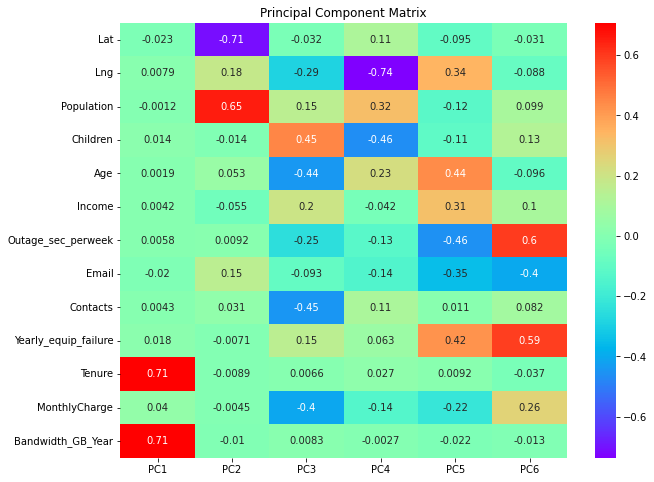

In [48]:
# create principal component matrix
plt.figure(figsize=(10,8))
sns.heatmap(pca6_comp.T,cmap='rainbow',
           annot=True,fmt='.2g')
plt.title('Principal Component Matrix')

In [49]:
col_list = scaled_df.columns

In [50]:
pc_load = pd.DataFrame(pca6.components_.T, columns=pc6_labels, index=scaled_df.columns)
print(pc_load)

                           PC1       PC2       PC3       PC4       PC5  \
Lat                  -0.023161 -0.714010 -0.031715  0.109414 -0.094872   
Lng                   0.007911  0.180879 -0.285753 -0.736871  0.344620   
Population           -0.001230  0.653439  0.151916  0.322012 -0.119517   
Children              0.014244 -0.014267  0.447882 -0.464670 -0.107498   
Age                   0.001860  0.052795 -0.443537  0.227235  0.436759   
Income                0.004185 -0.054602  0.195742 -0.041772  0.312779   
Outage_sec_perweek    0.005811  0.009174 -0.249550 -0.126214 -0.455981   
Email                -0.020020  0.152355 -0.092711 -0.144998 -0.353186   
Contacts              0.004283  0.031043 -0.447906  0.108875  0.011245   
Yearly_equip_failure  0.017665 -0.007070  0.153686  0.063449  0.420468   
Tenure                0.705211 -0.008913  0.006569  0.026652  0.009197   
MonthlyCharge         0.040456 -0.004500 -0.404228 -0.136041 -0.218356   
Bandwidth_GB_Year     0.706719 -0.0104